<a href="https://colab.research.google.com/github/mtamirm/anam/blob/main/HW1_208376079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Question 4 - Python - Parkinson's Disease Classification Data Analysis
---
In this exercise, we are going to do data analysis with Python and Pandas. As this is the first "real" exercise, we will add guidance for some of the tasks.

1. Warmup - Generate 100 samples from $\mathcal{N}(0,1)$ (`np.random.randn`). Compute a 95% CI for the CDF. Plot the true CDF, the CDF estimation and the CI in a single plot. To estimate $\hat{F}_n$ use a histogram (`np.histogram`). Repeat this $K=1000$ times and compute the percentage of time that the interval contained the CDF (print the value) . In addition, plot in another single figure the *true* CDF, and the best and worst experiments (use $\max_x|F(x) - \hat{F}_n(x)|$ as quality measure).
    * To compare np arrays element-wise use `np.less_equal(x1, x2 + eps), np.greater_equal(x1, x2 - eps)`, use `.all()` to verify if all the comaprisons were `True`.
    
We are now going to perform some real data analysis on the "Parkinson's Disease Classification Data Set": the data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82. During the data collection process, the microphone is set to 44.1 KHz and following the examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions. 

The features are various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

2. Load the data with pandas, drop the 'id' column, take a sample ($k=10$, `dataframe.sample(k)`) and view it.
    * The filename is `pd_speech_features.csv`.
3. Compute the empirical correlation between all pairs of features. Show the results both in a heatmap.
    * Use pandas `.corr()` to calculate the correaltion, and `plt.imshow()` to view the heatmap (2 heatmaps, one for the correlation and one for the absolute correlation). Add a color bar using `plt.colorbar()`
4. Print the top-20 most correlated features. Follow this steps:
    * Take the lower triangle of the correlation matrix (as it is symmetrical and we don't care about $Corr(X_i,X_i)$). Use `np.tril()`
    * Consider only positive correlation (because negative correlation has a different, useful meaning). You can do that by `X = X[X >0]`.
    * From here, these are recommended steps, feel free to achieve the goal in a different way.
        * Assignment to a pandas DataFrame: `X.loc[:,:] = np.(...)`
        * Unstacking the DataFrame (creates a new pivot, read the doc): `df.unstack()`
        * Sorting: `df.sort()`

5. What is the meaning when 2 different features are highly correlated? From a machine learning perspective, can a classifier learn new insights from highly-correlated features? In your answer, address the process of "feature selection" in ML (usually performed as a pre-processing step).

6. Compute the **in-class** correlation between features. Plot a heat map for each class. Address the differences between the heat maps.

7. Consider the features 'numPulses' and 'app_entropy_log_5_coef'. We wish to calculate the correlation between these features. We will use *Bootstrapping*.
    * Implement the bootstrap algorithm to calculate the standard deviation ($\sigma$) of the correlation.
        * You can use the algorithm from the tutorial, but you have to modify it to support 2 arrays.
        * The algorithm will output the empirical correlation of the two input features, and a bootstrap estimation for the std ($\sigma$). Use `K=300` bootstrap samples and `m=100` experiments.
        * Tips:
            * To get values for two columns: `data[['numPulses', 'app_entropy_log_5_coef']]`
            * To calculate correlation, check out `numpy.corrcoef`.

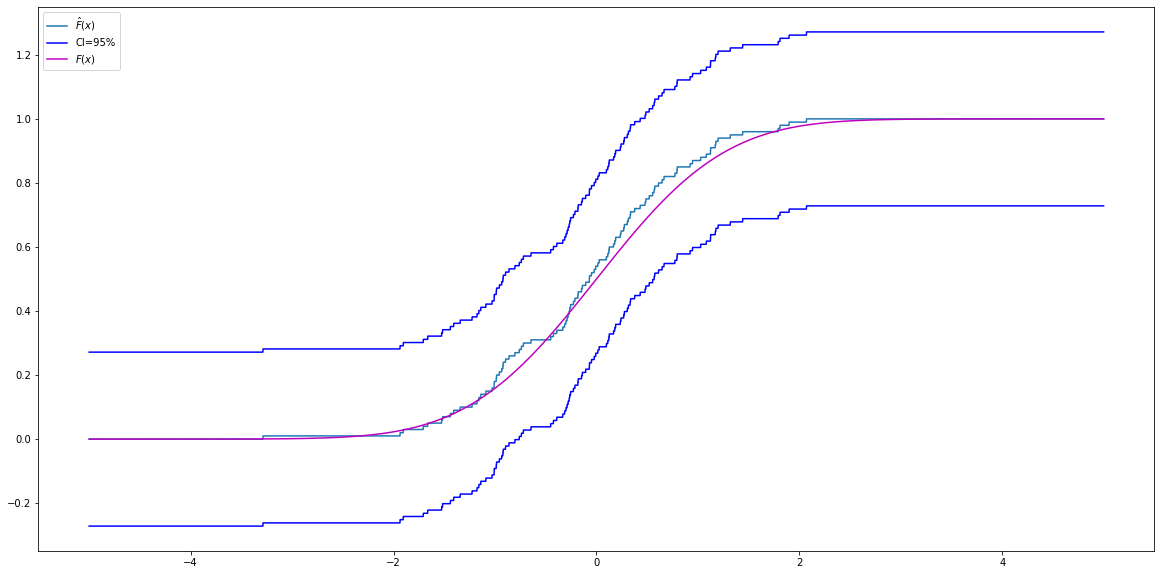

In [ ]:
# imports for q-4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats  import norm
######### review this section please asap fyi
plt.rcParams['figure.figsize'] = [20, 10]
N = 100
K = 1000
b = 10000
a = 0.05
# since Normal Dist. isn't bounded we'll use the proposition from q1
epsilon = np.sqrt(np.log(2/a)*(2/N))
t = np.linspace(-5, 5, 1000)
y = norm.cdf(t)
X = np.random.randn(N)
[F, Bins_vec] = np.histogram(X,b, range = (-5,5))
F_hat_norm = np.cumsum(F) / N 
Est_H = F_hat_norm + epsilon
Est_L = F_hat_norm - epsilon

plt.plot(Bins_vec[:-1],F_hat_norm, label = '$\hat{F}(x)$')
plt.plot(Bins_vec[:-1],Est_H,'b', label = 'CI=95%' )
plt.plot(Bins_vec[:-1],Est_L,'b')
# t = np.linspace(np.min(X), np.max(X), 1000)
plt.plot(t, y,'m', label = '$F(x)$')
plt.legend()
plt.show()
# plt.hist(F_hat)
#plot normal CDF



  


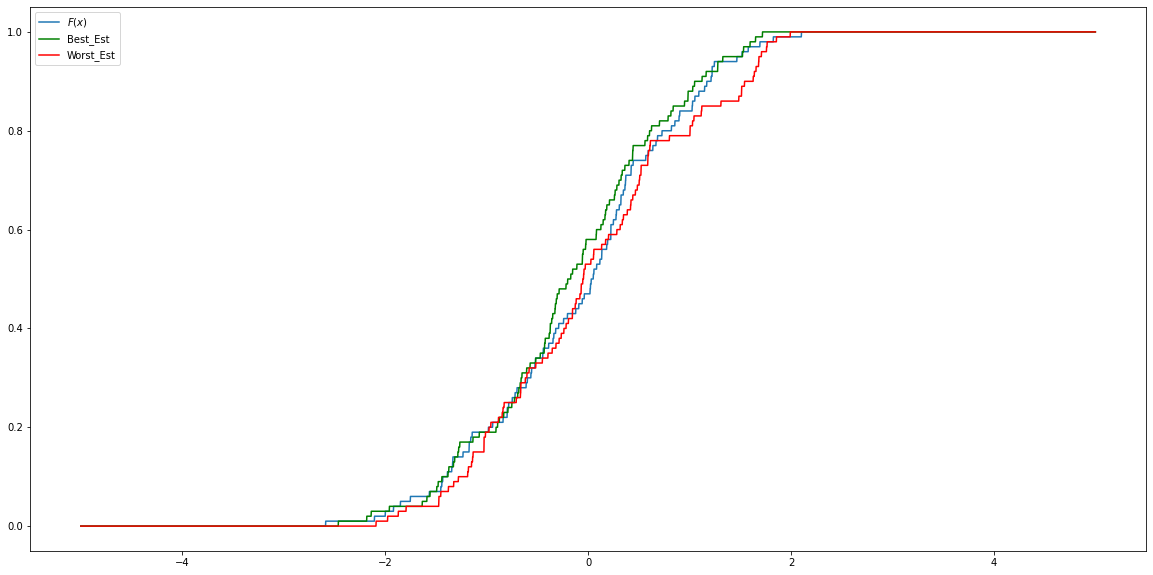

In [ ]:
## F hat Estimation using hist
minErr= np.inf
maxErr = -1
for i in range(0,K-1):
  X = np.random.randn(N)
  [F, Bins_vec] = np.histogram(X,b, range = (-5,5))
  F_hat_norm = np.cumsum(F) / N 
  Est_H = F_hat_norm + epsilon
  Est_L = F_hat_norm - epsilon
  current_err = np.max(np.abs(F_hat_norm - F))
  if current_err > maxErr:
    maxErr = current_err
    Worst_Est = F_hat_norm
    Worst_Est_bins = Bins_vec[:-1]
  if current_err < minErr:
    minErr = current_err
    Best_Est = F_hat_norm
    Best_Est_bins = Bins_vec[:-1]

plt.plot(Bins_vec[:-1],F_hat_norm, label = '${F}(x)$')
plt.plot(Best_Est_bins,Best_Est,'g', label = 'Best_Est' )
plt.plot(Worst_Est_bins,Worst_Est,'r', label = 'Worst_Est')
# t = np.linspace(np.min(X), np.max(X), 1000)
plt.legend()
plt.show()

In [ ]:
## Section 4.2
import io
k=10
# from google.colab import files
# uploaded = files.upload()
# df2 = pd.read_csv(io.BytesIO(uploaded['pd_speech_features.csv']))
# Dataset is now stored in a Pandas Dataframe
df2 = pd.read_csv('https://raw.githubusercontent.com/mtamirm/anam/main/pd_speech_features.csv')#, sep = '\t', header = 0)
df2.drop('id',inplace = True, axis = 1)
sampled = df2.sample(k)



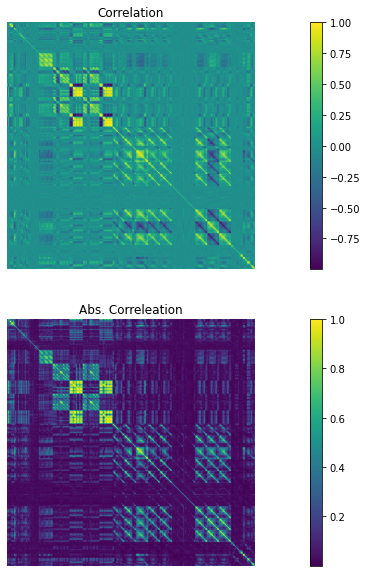

In [ ]:
## 4.3
corr = df2.corr()
abs_corr = np.abs(corr)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title('Correlation')
ax1.set_axis_off()
im1 = ax1.imshow(corr)
plt.colorbar(im1, ax=ax1)

ax2.set_title('Abs. Correleation')
ax2.set_axis_off()
im2 = ax2.imshow(abs_corr)
plt.colorbar(im2, ax=ax2)
plt.show()





In [ ]:
##4.4

corr.loc[:,:] = np.tril(corr, k = -1)
corr= corr[corr > 0]

corr_vec = corr.unstack().sort_values(ascending = False)
top_20_corr = corr_vec[0:20]
top_20_corr
# s = postive_lower_triangle.unstack()
# so = s.sort_values(kind="quicksort")
# so_max = so[so.shape[0]-20:so.shape[0]]
# so_max

apq3Shimmer                    ddaShimmer                        1.000000
app_LT_entropy_log_8_coef      app_LT_entropy_log_9_coef         1.000000
app_LT_entropy_shannon_8_coef  app_LT_entropy_shannon_9_coef     1.000000
app_entropy_log_8_coef         app_entropy_log_9_coef            1.000000
app_LT_entropy_log_9_coef      app_LT_entropy_log_10_coef        1.000000
app_LT_entropy_shannon_9_coef  app_LT_entropy_shannon_10_coef    0.999999
app_LT_entropy_log_8_coef      app_LT_entropy_log_10_coef        0.999999
app_entropy_shannon_8_coef     app_entropy_shannon_9_coef        0.999999
app_LT_entropy_shannon_8_coef  app_LT_entropy_shannon_10_coef    0.999999
app_entropy_shannon_9_coef     app_entropy_shannon_10_coef       0.999997
rapJitter                      ddpJitter                         0.999996
app_entropy_shannon_8_coef     app_entropy_shannon_10_coef       0.999995
app_LT_TKEO_mean_8_coef        app_LT_TKEO_mean_9_coef           0.999992
app_entropy_log_9_coef         app_ent

One meaning of highly correlated features can be that these features merely inculde the same information i.e there's redundancy. From a machine learning perspective, a classifier can not learn new insights from highly-correlated features. Thus when approaching the problem we can reduce the dimensions of the problem by choosing only one element of the pairs of highly correlated features.

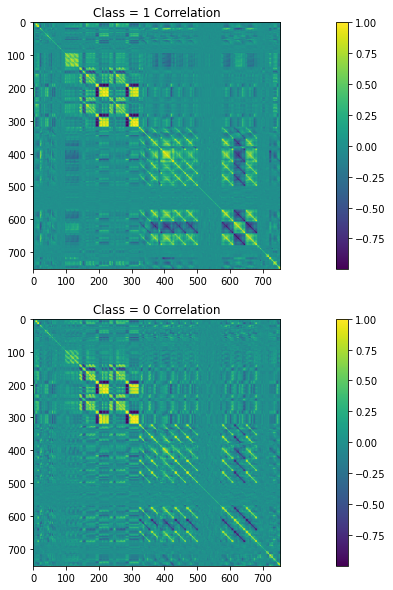

In [ ]:
df_class1 = df2.loc[df2['class']==True]
df_class0 = df2.loc[df2['class']==False]
df_class1.drop('class',inplace = True, axis = 1)
df_class0.drop('class',inplace = True, axis = 1)

corr1 = df_class1.corr()
abs_corr = np.abs(corr1)

corr0 = df_class0.corr()
abs_corr = np.abs(corr0)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title('Class = 1 Correlation')
# ax1.set_axis_off()
im1 = ax1.imshow(corr1)
plt.colorbar(im1, ax=ax1)

ax2.set_title('Class = 0 Correlation')
# ax2.set_axis_off()
im2 = ax2.imshow(corr0)
plt.colorbar(im2, ax=ax2)
plt.show()


The different heatmaps suggest that the features don't have the same correlations in both classes. These differences can mean we'll be able to classify the groups correctly based on their features correlations. We'll note that some features share the same correlation in both groups and won't help us in the learning process.

In [185]:
def std_bootstrap(x, k, m, estimator=np.mean):
    estimations = []
    for _ in range(m):
        # sample K with replacement
        x_k = x.sample(k)
        t_k = estimator(x_k['numPulses'],x_k['app_entropy_log_5_coef'])
        t_k = np.tril(t_k, k = -1)
        t_k= t_k[t_k > 0]
        estimations.append(t_k)
    return np.mean(estimations), np.std(estimations)

# generate real data
df_7 = df2[['numPulses', 'app_entropy_log_5_coef']]

K = 300  # number of bootstrap samples
M = np.arange(1, 101)  # number of boostrap iterations
stds = []
estims = []
for m in M:
    [estim, std] = std_bootstrap(x = df_7, k=K, m=m, estimator=np.corrcoef)
    stds.append(std) 
    estims.append(estim)
    # [1] because we don't care about the estimate, just the std
es = np.mean(estims)
st = np.mean(stds)
print('the estimated std is:', std)

the estimated std is: 0.0178428803754424


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/